# Marketing Campaign

### In this project, we are going to use machine learning algorithms to create a suitable category for customers and predict who will respond to the offer of a product or service.

In [196]:
import numpy as np                            # import Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

In [197]:
Data = pd.read_csv ('G:/Marketing_campaign.csv' ,sep = ";")
df = pd.DataFrame (Data) 
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Columns
- AcceptedCmp1 = 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 = 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 = 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 = 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 = 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) = 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain = 1 if customer complained in the last 2 years
- DtCustomer = date of customer’s enrolment with the company
- Education = customer’s level of education
- Marital = customer’s marital status
- Kidhome = number of small children in customer’s household
- Teenhome = number of teenagers in customer’s household
- Income = customer’s yearly household income
- MntFishProducts = amount spent on fish products in the last 2 years
- MntMeatProducts = amount spent on meat products in the last 2 years
- MntFruits = amount spent on fruits products in the last 2 years
- MntSweetProducts = amount spent on sweet products in the last 2 years
- MntWines = amount spent on wine products in the last 2 years
- MntGoldProds = amount spent on gold products in the last 2 years
- NumDealsPurchases = number of purchases made with discount
- NumCatalogPurchases = number of purchases made using catalogue
- NumStorePurchases = number of purchases made directly in stores
- NumWebPurchases = number of purchases made through company’s web site
- NumWebVisitsMonth = number of visits to company’s web site in the last month
- Recency = number of days since the last purchase

In [198]:
df.info()     # Knowing the type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [199]:
df.isna().sum()
# There are 24 missing values in Income

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [200]:
df.dropna(inplace=True)
df['Income'].isna().sum()

0

In [201]:
# for date of customer’s enrolment with the company For us, only the year is important
df_dt = df['Dt_Customer'].str.split('-',expand=True)
print(np.max(df_dt[0]))
# The latest registration was done in 2014

2014


In [202]:
Dtcustomer = 2015 - df_dt[0].astype(int)
df.insert (7, 'Dtcustomer', Dtcustomer)

In [203]:
# drop not important columns
df.drop(columns=['ID','Z_CostContact','Z_Revenue','Dt_Customer'], axis=1, inplace=True)

In [204]:
from pandas.api.types import is_numeric_dtype

In [205]:
small = []
# describe smallest values in all features
for col in df.columns:
    top_values = []
    if is_numeric_dtype(df[col]):
        top_values = df[col].nsmallest(n=5)
        small.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
pd.concat(small, axis=1)

,Year_Birth,Income,Kidhome,Teenhome,Dtcustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1893,1730.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1899,2447.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1900,3502.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1940,4023.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1941,4428.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
large = []
# describe largest values in all features
for col in df.columns:
    top_values = []
    if is_numeric_dtype(df[col]):
        top_values = df[col].nlargest(n=5)
        large.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
pd.concat(large, axis=1)

,Year_Birth,Income,Kidhome,Teenhome,Dtcustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1996,666666.0,2,2,3,99,1493,199,1725,259,...,28,13,20,1,1,1,1,1,1,1
1,1996,162397.0,2,2,3,99,1492,199,1725,258,...,28,13,20,1,1,1,1,1,1,1
2,1995,160803.0,2,2,3,99,1492,197,1622,258,...,28,13,20,1,1,1,1,1,1,1
3,1995,157733.0,2,2,3,99,1486,194,1582,258,...,22,13,19,1,1,1,1,1,1,1
4,1995,157243.0,2,2,3,99,1478,194,984,254,...,11,13,19,1,1,1,1,1,1,1


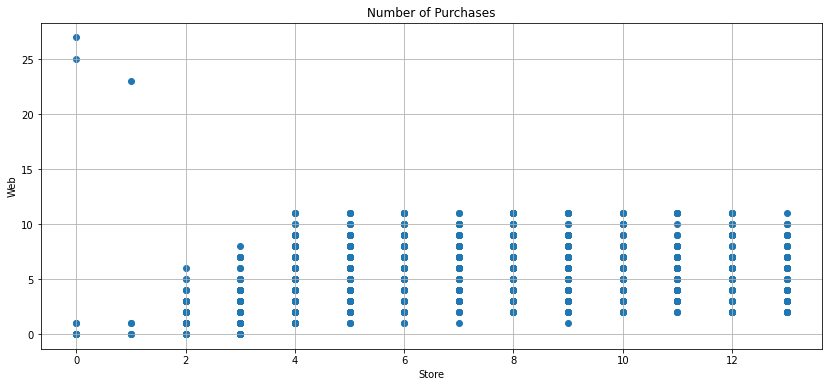

In [207]:
plt.figure(figsize=(14,6))
plt.scatter (df['NumStorePurchases'],df['NumWebPurchases'])
plt.xlabel ('Store')
plt.ylabel ('Web')
plt.title ('Number of Purchases')
plt.grid ()
plt.show()

### In three cases, there were people who made many online purchases, while in total they visited the store less than twice.
### We need to investigate further what is the reason for this

In [208]:
df[df['NumWebPurchases']>20]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dtcustomer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1806,1966,PhD,Single,7144.0,0,2,2,92,81,4,...,1,1,0,0,0,0,0,0,0,0
1898,1945,PhD,Single,113734.0,0,0,1,9,6,2,...,0,0,1,0,0,0,0,0,0,0
1975,1969,Graduation,Married,4428.0,0,1,2,0,16,4,...,0,0,1,0,0,0,0,0,0,0


In [211]:
df[df['NumWebPurchases']>0]['Response'].value_counts()

0    1836
1     332
Name: Response, dtype: int64

### The common feature of these people is that they did not accept the offer in the last campaign
### Also, upon further investigation, we realize that most of the people who have made an online purchase at least once did not accept the offer
### This is very important for us, so we have to provide more internet services

In [214]:
age = 2015 - df['Year_Birth']
df.drop(columns=['Year_Birth'],inplace=True)
df.insert(0, 'age', age)

In [215]:
print('The youngest customer :', df.age.min())
print('\nThe oldest customer :\n', df.age.nlargest(5))

The youngest customer : 19

The oldest customer :
 239     122
339     116
192     115
1950     75
424      74
Name: age, dtype: int64


In [216]:
df.drop(index=[239,339,192],inplace=True)

In [217]:
df['Income'].nlargest(5)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
Name: Income, dtype: float64

In [218]:
df.loc[2233]

age                            38
Education              Graduation
Marital_Status           Together
Income                   666666.0
Kidhome                         1
Teenhome                        0
Dtcustomer                      2
Recency                        23
MntWines                        9
MntFruits                      14
MntMeatProducts                18
MntFishProducts                 8
MntSweetProducts                1
MntGoldProds                   12
NumDealsPurchases               4
NumWebPurchases                 3
NumCatalogPurchases             1
NumStorePurchases               3
NumWebVisitsMonth               6
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Response                        0
Name: 2233, dtype: object

<AxesSubplot:xlabel='Income', ylabel='MntWines'>

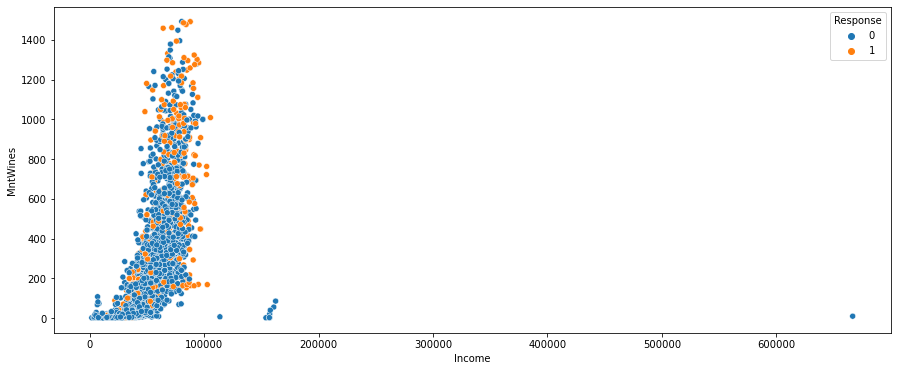

In [234]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Income',y='MntWines',hue='Response',data=df)

### Basically, with the increase in the income of the customers, they accepted the campaign offer, but not after a certain point 
### So it is better to leave unreasonable values ​​aside

In [237]:
df.drop (index=2233, axis=0, inplace=True)

In [236]:
Accepted = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df.insert (25, 'Accepted', Accepted)
df.drop (columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], inplace=True)
df.head()

,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dtcustomer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Accepted,Response
0,58,Graduation,Single,58138.0,0,0,3,58,635,88,...,88,88,3,8,10,4,7,0,0,1
1,61,Graduation,Single,46344.0,1,1,1,38,11,1,...,1,6,2,1,1,2,5,0,0,0
2,50,Graduation,Together,71613.0,0,0,2,26,426,49,...,21,42,1,8,2,10,4,0,0,0
3,31,Graduation,Together,26646.0,1,0,1,26,11,4,...,3,5,2,2,0,4,6,0,0,0
4,34,PhD,Married,58293.0,1,0,1,94,173,43,...,27,15,5,5,3,6,5,0,0,0


In [238]:
df['Education'].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [239]:
df['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [240]:
df[(df['Marital_Status']=='Absurd') | (df['Marital_Status']=='YOLO')]

,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dtcustomer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Accepted,Response
2093,22,Graduation,Absurd,79244.0,0,0,3,58,471,102,...,61,245,1,4,10,7,1,0,2,1
2134,58,Master,Absurd,65487.0,0,0,1,48,240,67,...,0,163,3,3,5,6,2,0,0,0
2177,42,PhD,YOLO,48432.0,0,1,3,3,322,3,...,3,42,5,7,1,6,8,0,0,0
2202,42,PhD,YOLO,48432.0,0,1,3,3,322,3,...,3,42,5,7,1,6,8,0,0,1


In [241]:
df.drop (index=[2093,2134,2177,2202], inplace=True)

In [242]:
def gender_to_numeric(x):               # We write a function that convert str to int
    if x=='Basic': return 2
    if x=='2n Cycle':   return 3
    if x=='Graduation': return 4
    if x=='Master': return 5
    if x=='PhD': return 6
    
    if x=='Married': return 3
    if x=='Together': return 3
    if x=='Single': return 2
    if x=='Divorced': return 2
    if x=='Widow': return 2
    if x=='Alone': return 2

df['Education'] = df['Education'].apply(gender_to_numeric)
df['Marital_Status'] = df['Marital_Status'].apply(gender_to_numeric)

df.head()

,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dtcustomer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Accepted,Response
0,58,4,2,58138.0,0,0,3,58,635,88,...,88,88,3,8,10,4,7,0,0,1
1,61,4,2,46344.0,1,1,1,38,11,1,...,1,6,2,1,1,2,5,0,0,0
2,50,4,3,71613.0,0,0,2,26,426,49,...,21,42,1,8,2,10,4,0,0,0
3,31,4,3,26646.0,1,0,1,26,11,4,...,3,5,2,2,0,4,6,0,0,0
4,34,6,3,58293.0,1,0,1,94,173,43,...,27,15,5,5,3,6,5,0,0,0


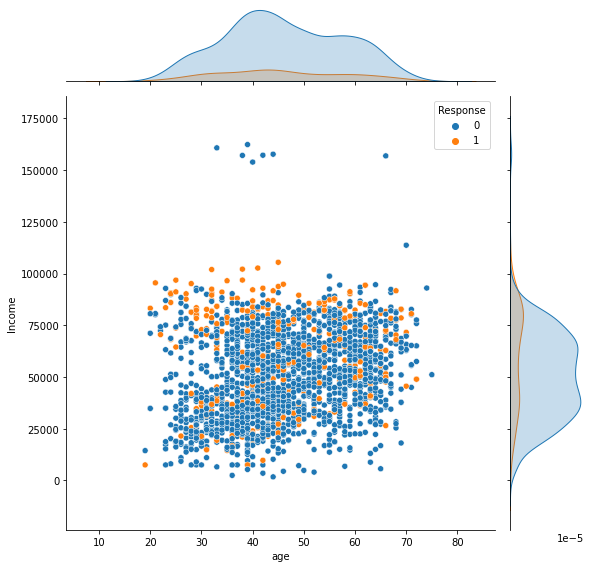

In [248]:
sns.jointplot(data=df, x="age", y="Income", hue="Response", size=8)

In [249]:
df['Response'].value_counts()

0    1877
1     331
Name: Response, dtype: int64

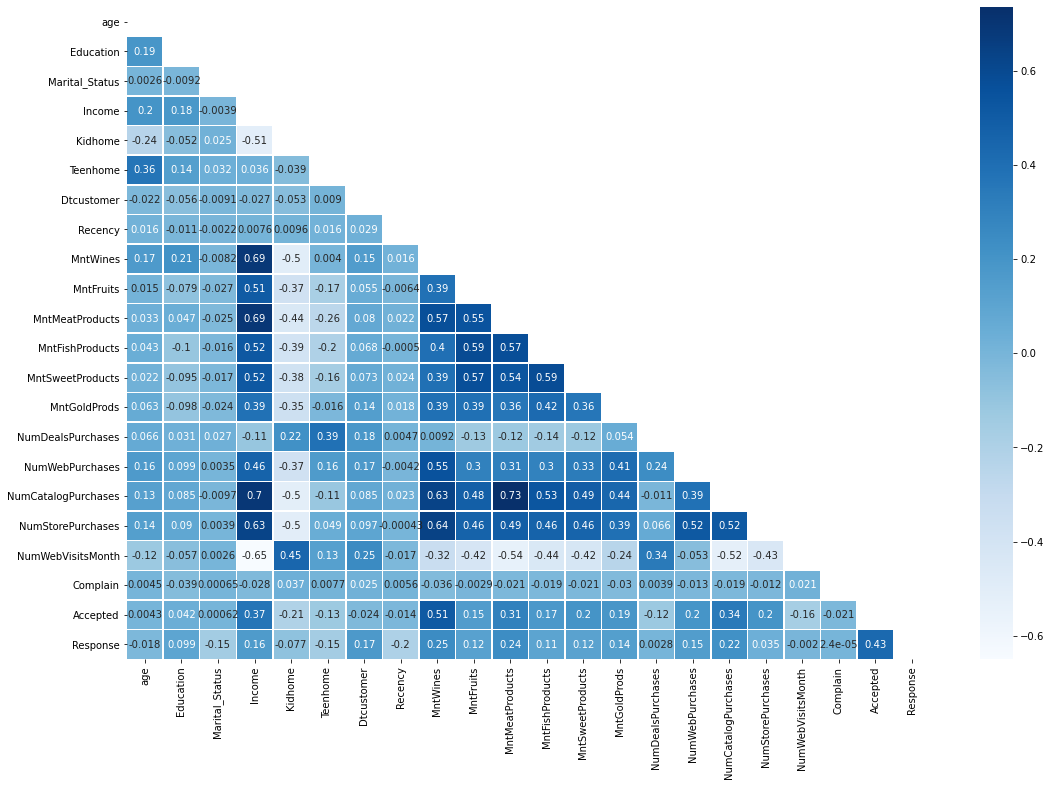

In [250]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig , ax = plt.subplots (figsize = (18,12))
sns.heatmap (df.corr(), cmap='Blues', cbar=True, annot=True, linewidths=0.5, mask=mask)
plt.show()

### As it is known, income has the highest correlation and after that the purchases made have a high correlation

# Clustering

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)
dfx = pd.DataFrame(data=X, columns=df.columns)
dfx

,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dtcustomer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Accepted
0,1.017915,-0.457550,-1.353059,0.287689,-0.824004,-0.929587,1.502099,0.309118,0.977018,1.553315,...,1.482521,0.858552,0.352174,1.427120,2.506603,-0.555083,0.692301,-0.095607,2.381322,-0.438906
1,1.274437,-0.457550,-1.353059,-0.260057,1.038228,0.907950,-1.417474,-0.382230,-0.871705,-0.636864,...,-0.634157,-0.733610,-0.167612,-1.125249,-0.570823,-1.169892,-0.133077,-0.095607,-0.419935,-0.438906
2,0.333858,-0.457550,0.739066,0.913505,-0.824004,-0.929587,0.042313,-0.797039,0.357814,0.571511,...,-0.147565,-0.034612,-0.687398,1.427120,-0.228887,1.289346,-0.545767,-0.095607,-0.419935,-0.438906
3,-1.290779,-0.457550,0.739066,-1.174887,1.038228,-0.929587,-1.417474,-0.797039,-0.871705,-0.561341,...,-0.585498,-0.753027,-0.167612,-0.760624,-0.912759,-0.555083,0.279612,-0.095607,-0.419935,-0.438906
4,-1.034258,1.535094,0.739066,0.294887,1.038228,-0.929587,-1.417474,1.553545,-0.391748,0.420464,...,-0.001587,-0.558861,1.391746,0.333248,0.113050,0.059727,-0.133077,-0.095607,-0.419935,-0.438906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,0.162843,-0.457550,0.739066,0.430965,-0.824004,0.907950,0.042313,-0.105691,1.196257,0.420464,...,2.212410,3.945792,-0.167612,1.791745,0.113050,-0.555083,-0.133077,-0.095607,-0.419935,-0.438906
2204,1.958494,1.535094,0.739066,0.560586,2.900460,0.907950,-1.417474,0.239984,0.298560,-0.662038,...,-0.658487,-0.694777,2.431318,1.427120,-0.228887,-0.247678,0.692301,-0.095607,-0.419935,1.033897
2205,-1.034258,-0.457550,-1.353059,0.233954,-0.824004,-0.929587,-1.417474,1.449843,1.785834,0.546336,...,-0.366531,-0.384111,-0.687398,-0.760624,0.113050,2.211560,0.279612,-0.095607,-0.419935,1.033897
2206,1.103422,0.538772,0.739066,0.803529,-0.824004,0.907950,-1.417474,-1.419252,0.363739,0.093196,...,0.071402,0.334303,-0.167612,0.697872,0.796922,1.289346,-0.958456,-0.095607,-0.419935,-0.438906


## PCA

In [116]:
from sklearn.decomposition import PCA
pca = PCA()
data = pca.fit(dfx)
pca.explained_variance_ratio_

array([0.29495138, 0.09438943, 0.07384272, 0.06765716, 0.04726864,
       0.04596916, 0.04549955, 0.04001372, 0.03906564, 0.03427186,
       0.02936623, 0.0283346 , 0.02386829, 0.02178041, 0.01951503,
       0.01891345, 0.01771329, 0.01751466, 0.01236328, 0.01075019,
       0.00952622, 0.00742511])

In [117]:
pca.explained_variance_ratio_.cumsum()

array([0.29495138, 0.38934081, 0.46318353, 0.53084069, 0.57810933,
       0.62407849, 0.66957804, 0.70959175, 0.74865739, 0.78292924,
       0.81229547, 0.84063007, 0.86449836, 0.88627877, 0.9057938 ,
       0.92470725, 0.94242053, 0.95993519, 0.97229848, 0.98304867,
       0.99257489, 1.        ])

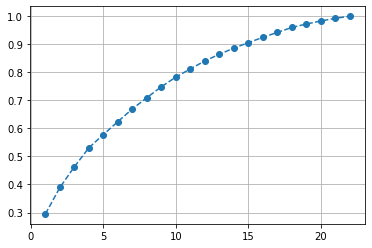

In [118]:
plt.plot (range(1,23), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.grid()

In [119]:
pca = PCA(n_components=5)    # start pca whth 4 componant
data = pca.fit(dfx)
pca_transform = pca.transform(dfx)

## K_Means

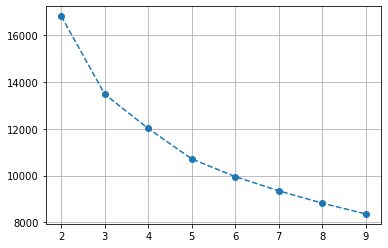

In [120]:
from sklearn.cluster import KMeans
List = []
for k in range (2,10) :
    kmeans_pca = KMeans (n_clusters=k,random_state=0)
    kmeans_pca.fit (pca_transform)
    List.append (kmeans_pca.inertia_)

plt.plot (range(2,10), List, marker='o', linestyle='--')
plt.grid()

In [121]:
kmeans_pca = KMeans (n_clusters=4, random_state=0)  # want 4 clusters
label = kmeans_pca.fit (pca_transform)
canters = kmeans_pca.cluster_centers_
label.labels_

array([2, 0, 3, ..., 3, 3, 1])

In [122]:
pca_data = pd.DataFrame(pca_transform,columns=['PC1','PC2','PC3','PC4','PC5']) 
pca_data.insert (0, 'Cluster', label.labels_)    # add labels to dataframe
pca_data

,Cluster,PC1,PC2,PC3,PC4,PC5
0,2,3.953648,0.086338,2.565097,-0.832787,1.262352
1,0,-2.398024,-0.168025,-1.442658,0.794018,1.547133
2,3,1.770521,-0.288318,-0.553766,-0.694971,0.327112
3,0,-2.675155,-1.640316,-0.036820,0.049235,-0.240159
4,0,-0.385802,-0.149105,-0.655836,-0.194960,-1.878254
...,...,...,...,...,...,...
2203,3,2.515489,1.107122,0.103794,-1.933592,0.248344
2204,1,-1.292642,3.187385,-0.636259,1.270510,-1.150641
2205,3,1.382930,-1.089703,-0.280618,0.588368,-0.992429
2206,3,1.902645,0.833458,-2.025363,0.419359,0.970395


In [106]:
pd.Categorical(label.labels_)

[3, 2, 1, 2, 2, ..., 1, 0, 1, 1, 0]
Length: 2208
Categories (4, int64): [0, 1, 2, 3]

<AxesSubplot:xlabel='PC1', ylabel='PC3'>

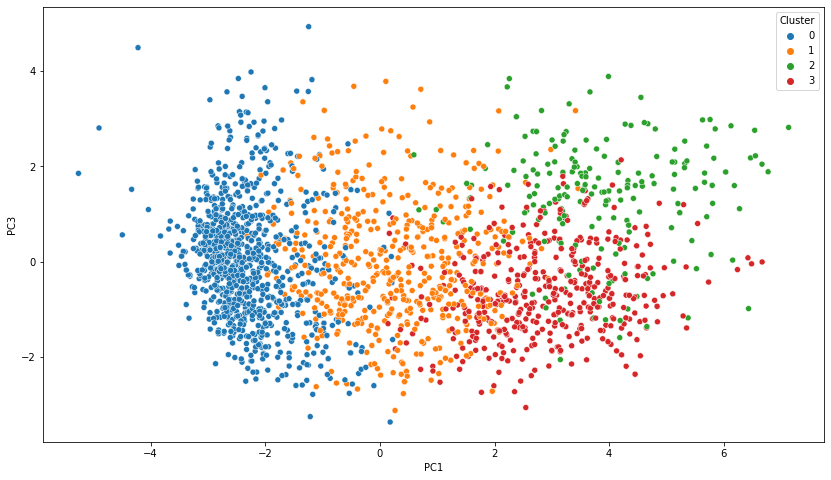

In [159]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='PC1',y='PC3',hue='Cluster',data=pca_data,
               palette='tab10', legend='full')

# Classification

In [254]:
x = df.drop('Response',axis=1)
y = df.Response

# K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

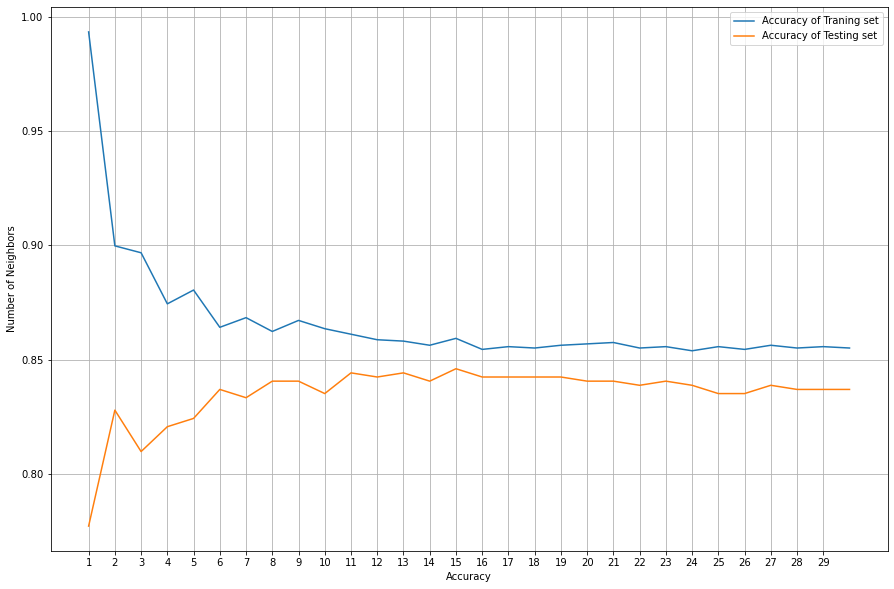

In [255]:
train_acc = []        # Accuracy of train
test_acc = []         # Accuracy of test
number_k = range(1,31)  # range of K
for K in number_k :
    x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.25, random_state=0)
    knn = KNeighborsClassifier(K)
    knn.fit(x_train,y_train.ravel())
    train_acc.append (knn.score(x_train,y_train))
    test_acc.append (knn.score(x_test,y_test))

plt.figure(figsize=(15,10))
plt.plot(number_k,train_acc, label='Accuracy of Traning set')
plt.plot(number_k,test_acc, label='Accuracy of Testing set')
plt.xlabel('Accuracy')
plt.ylabel('Number of Neighbors')
plt.xticks(range(1,30))
plt.grid()
plt.legend()
# The best number is where the accuracy of test and the accuracy of train are close together
# and the accuracy of the test is high

In [256]:
k = 11
clf = KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)
print (metrics.accuracy_score(y_test,y_pred))
print (np.max(test_acc))

0.8442028985507246
0.8460144927536232


## Best Accuracy is %84

In [257]:
from sklearn.model_selection import GridSearchCV

# DecisionTree

In [258]:
from sklearn.tree import DecisionTreeClassifier

In [259]:
x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.2, random_state=0)

In [260]:
DTs = DecisionTreeClassifier(max_depth=3, criterion='entropy' ,random_state = 0)
DTs.fit(x_train,y_train)
pred = DTs.predict(x_test)
acc = metrics.accuracy_score(y_test,pred)
acc

0.8800904977375565

In [269]:
param = {'max_depth':[1,2,3,4,5,6,7,8,9,10],
        'criterion':['entropy','gini']}
grid_DTs = GridSearchCV (estimator=DecisionTreeClassifier(),
                     param_grid=param,
                     cv=5,
                     scoring='accuracy')
grid_DTs.fit(x_train,y_train)
grid_DTs.best_params_

{'criterion': 'entropy', 'max_depth': 3}

## Best Accuracy is %88

# RandomForest

In [263]:
from sklearn.ensemble import RandomForestClassifier

In [270]:
RF = RandomForestClassifier(n_estimators=100, max_depth=3, criterion='entropy' ,random_state = 0)
RF.fit(x,y)
pred = RF.predict(x_test)
acc2 = metrics.accuracy_score(y_test,pred)
acc2

0.8574660633484162

In [273]:
param = {'max_depth':[1,2,3,4,5,6,7,8,9,10],
        'criterion':['entropy','gini'],
        'n_estimators':[10,25,50,100,200,300]}
grid_RF = GridSearchCV (estimator=RandomForestClassifier(),
                     param_grid=param,
                     cv=5,
                     scoring='accuracy')
grid_RF.fit(x_train,y_train)
grid_RF.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 25}

In [274]:
RF = RandomForestClassifier(n_estimators=25, max_depth=10, criterion='gini' ,random_state = 0)
RF.fit(x,y)
pred = RF.predict(x_test)
acc2 = metrics.accuracy_score(y_test,pred)
acc2

0.9705882352941176

## Best Accuracy is %97

# Support Vector Machine (SVM)

In [264]:
from sklearn.svm import SVC

In [275]:
svm = SVC(C=5, kernel='poly',random_state = 0)
svm.fit(x,y)
pred = svm.predict(x_test)
acc3 = metrics.accuracy_score(y_test,pred)
acc3

0.8529411764705882

In [277]:
param = {'kernel':['poly','rbf','linear','sigmoid'],
        'C':[1,2,3,4,5,6,7,8,9,10]}
grid_SVM = GridSearchCV (estimator=SVC(),
                     param_grid=param,
                     cv=5,
                     scoring='accuracy')
grid_SVM.fit(x_train,y_train)
grid_SVM.best_params_

{'C': 1, 'kernel': 'poly'}

In [278]:
svm = SVC(C=1, kernel='poly',random_state = 0)
svm.fit(x,y)
pred = svm.predict(x_test)
acc3 = metrics.accuracy_score(y_test,pred)
acc3

0.8529411764705882

## Best Accuracy is %85